# Parte 2 del proyecto


In [1]:
import pandas as pd

dataset_general = pd.read_excel('../media/dataset_punto2.xlsx')

dataset_general.head(10)


,jornada,velocidad_produccion,consumo_energia
0,1,92,126.1
1,2,97,127.3
2,3,123,148.0
3,4,101,144.5
4,5,102,129.3
5,6,126,166.0
6,7,107,120.1
7,8,81,120.6
8,9,90,123.2
9,10,93,126.6


In [2]:
dataset_general.columns.values

array(['jornada', 'velocidad_produccion', 'consumo_energia'], dtype=object)

### Realice un análisis descriptivo de las variables involucradas:

In [3]:
# Calcule estadísticas descriptivas para el consumo energético y la velocidad de producción
import numpy as np

import pandas as pd


def get_mtc(dataset):
    
    columns = ['velocidad_produccion (Media)','consumo_energia (Media)','velocidad_produccion (mediana)','consumo_energia (mediana)','velocidad_produccion (Moda)','consumo_energia (Moda)']
    
    data = []

    data.append(dataset['velocidad_produccion'].mean())
    data.append(dataset['consumo_energia'].mean())
    data.append(dataset['velocidad_produccion'].median())
    data.append(dataset['consumo_energia'].median())
    data.append(dataset['velocidad_produccion'].mode()[0])
    data.append(dataset['consumo_energia'].mode()[0])


    data = np.array(data).reshape(1,-1) #Redimensionar para quedar en el mismo tamaño de las columnas
    
    dataset = pd.DataFrame(data=data, columns=columns)

    return dataset

dataset_mtc = get_mtc(dataset_general)

dataset_mtc

,velocidad_produccion (Media),consumo_energia (Media),velocidad_produccion (mediana),consumo_energia (mediana),velocidad_produccion (Moda),consumo_energia (Moda)
0,100.56,131.912,99.0,131.7,93.0,136.7


In [4]:
def get_dispersion_metrics(dataset):

    columns = ['velocidad_produccion (STD)','consumo_energia (STD)','velocidad_produccion (VAR)','consumo_energia (VAR)','velocidad_produccion (Range)','consumo_energia (Range)','velocidad_produccion (Cof_Var)','consumo_energia (Cof_Var)',]

    data = []

    data.append(dataset['velocidad_produccion'].std())
    data.append(dataset['consumo_energia'].std())
    data.append(dataset['velocidad_produccion'].var())
    data.append(dataset['consumo_energia'].var())
    data.append(dataset['velocidad_produccion'].max() - dataset['velocidad_produccion'].min())
    data.append(dataset['consumo_energia'].max() - dataset['consumo_energia'].min())
    data.append(dataset['velocidad_produccion'].std() / dataset['velocidad_produccion'].mean())
    data.append(dataset['consumo_energia'].std() / dataset['consumo_energia'].mean())

    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_dispersion = get_dispersion_metrics(dataset_general)

dataset_dispersion

    

,velocidad_produccion (STD),consumo_energia (STD),velocidad_produccion (VAR),consumo_energia (VAR),velocidad_produccion (Range),consumo_energia (Range),velocidad_produccion (Cof_Var),consumo_energia (Cof_Var)
0,13.82863,14.037394,191.23102,197.048424,62.0,61.5,0.137516,0.106415


In [5]:
def get_form_metrics(dataset):
    
    columns = ['velocidad_produccion (Asimetria)','consumo_energia (Asimetria)','velocidad_produccion (Curtosis)','consumo_energia (Curtosis)']

    data = []

    data.append(dataset['velocidad_produccion'].skew())
    data.append(dataset['consumo_energia'].skew())
    data.append(dataset['velocidad_produccion'].kurtosis())
    data.append(dataset['consumo_energia'].kurtosis())

    
    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_form = get_form_metrics(dataset_general)


dataset_form


,velocidad_produccion (Asimetria),consumo_energia (Asimetria),velocidad_produccion (Curtosis),consumo_energia (Curtosis)
0,0.196527,0.14852,-0.29868,-0.547057


### Historigrama

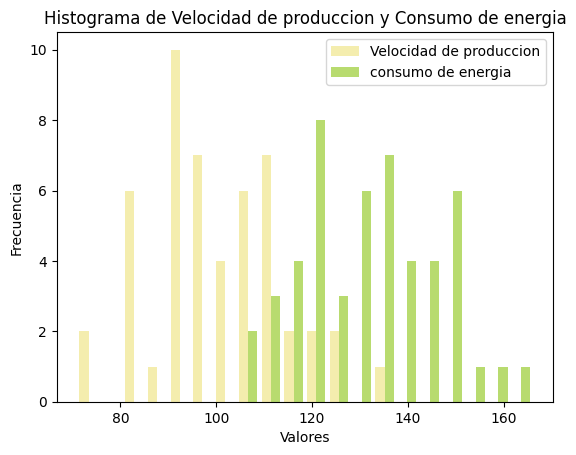

In [6]:
import matplotlib.pyplot as plt 

fig, ax_hist = plt.subplots()


def create_hist():
    #Creamos el diagrama el historigrama
    ax_hist.hist([dataset_general['velocidad_produccion'], dataset_general['consumo_energia']], #El primer argumento es la lista de los 2
                bins=20, alpha=0.7, label=['Velocidad de produccion', 'consumo de energia'],
                color=['khaki', 'yellowgreen']) #Aqui lo mismo

    # Etiquetas y texto
    ax_hist.set_xlabel('Valores')
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.set_title('Histograma de Velocidad de produccion y Consumo de energia')
    ax_hist.legend()
    plt.show()


create_hist()

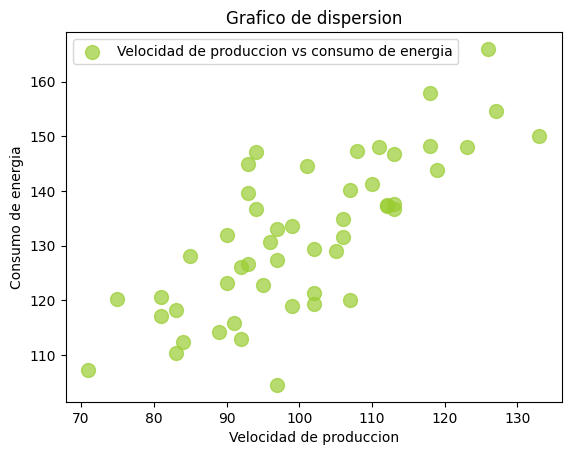

Visualmente podemos ver que hay un correlacion lineal positiva de las variables 


In [7]:
def create_scatter(dataset):
    #Creamos la instancia
    fig, ax_scatter = plt.subplots()

    #Se crea el grafico de dispersion
    ax_scatter.scatter(dataset['velocidad_produccion'],dataset['consumo_energia'],
                    alpha=0.7, 
                    label='Velocidad de produccion vs consumo de energia',s=100,color='yellowgreen')

    ax_scatter.set_xlabel('Velocidad de produccion')
    ax_scatter.set_ylabel("Consumo de energia")
    
    ax_scatter.set_title("Grafico de dispersion")
    ax_scatter.legend()
    plt.show()


create_scatter(dataset_general)
print('Visualmente podemos ver que hay un correlacion lineal positiva de las variables ')

#### Interpretar mas a detalle en la pagina web

## b) Determine el coeficiente de correlación entre el consumo energético y la velocidad de producción:

In [8]:
cof_correlation = np.corrcoef(dataset_general['velocidad_produccion'],dataset_general['consumo_energia'])

print(f'El coeficiente de correlacion entre las 2 variables es de {np.round(cof_correlation[0,1],3)},\npor lo tanto hay CORRELACION LINEAL ALTA.')


El coeficiente de correlacion entre las 2 variables es de 0.764,
por lo tanto hay CORRELACION LINEAL ALTA.


### Realice una prueba de hipótesis para determinar si la correlación es estadísticamente significativa

In [9]:
#TO DO

### Interprete el resultado en el contexto del problema (Pagina web)

## Crear una regresion lineal

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


In [11]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


def recomendar_modelo_regresion(df, var_x, var_y):
    X = df[[var_x]].values
    y = df[var_y].values

    modelos = {
        'Regresión Lineal': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1)
    }

    resultados = {}

    print("\n--- Evaluación de modelos (R² con cross-validation) ---\n")
    for nombre, modelo in modelos.items():
        scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
        promedio = np.mean(scores)
        resultados[nombre] = promedio
        print(f"{nombre}: R² promedio = {promedio:.4f}")

    mejor_modelo = max(resultados, key=resultados.get)
    print("\n--- Resultados ---")
    print(f"\n✅ Modelo recomendado: {mejor_modelo}")
    print(f"Valores de R² promedio:\n{resultados}")

    return mejor_modelo, resultados


modelo_recomendado = recomendar_modelo_regresion(dataset_general, 'velocidad_produccion', 'consumo_energia')

print(modelo_recomendado)


--- Evaluación de modelos (R² con cross-validation) ---

Regresión Lineal: R² promedio = 0.4171
Ridge: R² promedio = 0.4171
Lasso: R² promedio = 0.4171

--- Resultados ---

✅ Modelo recomendado: Regresión Lineal
Valores de R² promedio:
{'Regresión Lineal': np.float64(0.41713690186067326), 'Ridge': np.float64(0.4171288242465792), 'Lasso': np.float64(0.41709214453134347)}
('Regresión Lineal', {'Regresión Lineal': np.float64(0.41713690186067326), 'Ridge': np.float64(0.4171288242465792), 'Lasso': np.float64(0.41709214453134347)})


### Con esto ya concluimos que cualquier modelo de los planteados nos serviria sea Lineal , Lasso o Ridge. En este caso usaremos Lineal 

In [12]:
#Creando la regression lineal ,datos de entreno y testeo ,estandarizacion para un mejor rendimiento

modelo_estandarizador = StandardScaler()

dataset_estandarizado = modelo_estandarizador.fit_transform(dataset_general.drop(columns='jornada'))


dataset_estandarizado = pd.DataFrame(columns=['velocidad_produccion','consumo_energia'],data=dataset_estandarizado)

dataset_estandarizado.head(10)



,velocidad_produccion,consumo_energia
0,-0.625290,-0.418240
1,-0.260051,-0.331887
2,1.639195,1.157717
3,0.032141,0.905852
4,0.105189,-0.187964
5,1.858339,2.453025
6,0.470429,-0.850010
7,-1.428817,-0.814029
8,-0.771386,-0.626929
9,-0.552242,-0.382260


In [13]:
X = dataset_estandarizado['velocidad_produccion'].values.reshape(-1,1)

Y = dataset_estandarizado['consumo_energia'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42)


regression = LinearRegression()

regression

LinearRegression()

In [14]:
# Entrenar el modelo
regression.fit(X_train,y_train)


LinearRegression()

In [15]:
print(f'El peso (Coeficiente) del modelo es {regression.coef_[0].round(4)} y su sesgo (intercepto) es {regression.intercept_[0].round(4)}')

El peso (Coeficiente) del modelo es [0.8283] y su sesgo (intercepto) es -0.0237


$$ Y = WX + B $$

$$ \text{-W weight o peso} $$
$$ \text{-B bias o sesgo} $$

$$ Y = 0.8283X -0.0237 $$


### Analisis mas detallados del peso y sesgo mas a detalle en la pagina web

In [16]:

# Hacer predicciones con el conjunto de prueba
y_pred = regression.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred) #El error que tienen los valores cuadraticamente
print(f'Error cuadrático medio (MSE): {mse:.4f}')

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del error cuadrático medio (RMSE): {rmse:.4f}') #Me lo entrega en una escala entendible , las predicciones estan desviadas de los reales segun este valor

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_pred) #Variabilidad de los valores con los datos ,La variable X captura la variabilidad y comportamiento de la Y
print(f'Coeficiente de determinación (R²): {r2:.4f}')

print('\nInterpretación:')
print(f'- El modelo explica el {r2*100:.2f}% de la variabilidad en los datos')
print(f'- El error promedio en las predicciones es de {rmse:.4f} unidades')
print('- El modelo presenta una precision muy baja , esto pueden ser por sus bajos registros')

Error cuadrático medio (MSE): 0.3605
Raíz del error cuadrático medio (RMSE): 0.6004
Coeficiente de determinación (R²): 0.4150

Interpretación:
- El modelo explica el 41.50% de la variabilidad en los datos
- El error promedio en las predicciones es de 0.6004 unidades
- El modelo presenta una precision muy baja , esto pueden ser por sus bajos registros
